<a href="https://colab.research.google.com/github/nklsKrmnn/LSC_Sentiment_Analysis/blob/main/Projekt_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/LSC_Sentiment_Analysis/notebooks'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/LSC_Sentiment_Analysis/notebooks


# 0. Imports

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import warnings

warnings.filterwarnings("ignore")


In [68]:
%cd Documents\LSC\LSC_Sentiment_Analysis\Notebooks

[Errno 2] No such file or directory: 'DocumentsLSCLSC_Sentiment_AnalysisNotebooks'
/content/drive/MyDrive/LSC_Sentiment_Analysis/notebooks


# 1. Dataset: Movie Reviews

Das erste Dataset, dass wir betrachten wollten ist ein Rotten Tomatoes Movie Review Dataset von Kaggle (https://www.kaggle.com/competitions/movie-review-sentiment-analysis-kernels-only/overview). Zu diesem Datensatz gab es im Jahr 2018 ein Kaggle Challange. Wir haben uns für diesen Datensatz entschieden, weil man hier mit der Challange eine Benchmark hat, gegen die man seine eigenen Ergebnisse messen kann. Leider ist aus Gründen, die wir weiter unten ausführen, nicht zum Ende des Projektes diese Vergleichbarkeit nicht mehr 100% gegeben.

## 1.1 Technische Datenstruktur

Der Datensatz besteht aus 156.060 Datensätzen, die jeweils aus einer Phrase, einem Sentiment Score sowie eine PhraseID und eine SentenceID bestehen. Bei einem Blick auf die Info-Ausgabe fällt auf, dass alle Sampels mit allen Attributen gepflegt sind, was erstmal vermuten lässt, dass man keine Datenaufbereitung hinsichtlich fehlen Daten durchführen muss. Auch sind die Feature in passenden Datentypen vorhanden. Die Ids sowie der Sentiment Score, welcher die Sentiment codiert abbildet, sind als Integer gegeben. Die Phrase, welches die zu klassifizierende Movie Review ist, ist ein String-Object.

In [69]:
# TODO: Bedeutung Sentiment Score

In [70]:
dataset_mr = pd.read_csv("../data/train.tsv", sep='\t')

In [71]:
dataset_mr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


## 1.2 Inhaltliche Struktur der Daten

Zur inhaltliche Analyse der Daten haben wir uns zu nächst die ersten Zeilen Ausgeben lassen, um ein Gefühl für die Daten zu erlangen. Auf den ersten Blick sieht man, dass die Sätze in den ersten 10 Zeilen Bestandteile des ersten Satzes sind. Die Vermutung, dass es sich dabei um die selbe Review handelt wird dadurch gestätigt, dass sie die selbe SentenceId haben. Merkwürdigerweise ist der Sentiment Score für die verschiedenen Satzfragmente unterschiedliche. Beim Plotten der Daten nach Häufigkeit der Sentiment Scores fällt außerdem auf, dass diese sehr ungleich verteilt sind. Es sind deutlich mehr Samples mit mittlerem Score vorhanden, als mit positiven oder negativen Scores. Man kann hier also von unbalancierten Daten sprechen. Man spricht von unbalancierten Daten, wenn Daher haben wir zunächst einmal alle Fragmente aus unseren Daten aussortiert und nur noch die vollständigen Sätze im Datensatz behalten. Im darauf folgenden Plot erkennt man, dass die bereinigen Daten etwas stärker balanciert sind. Jedoch enthält der Datensatz nach dieser Filterung nur noch 8.529 Samples.

In [72]:
# TODO: Quelle unbalancierte DAten

In [73]:
pd.set_option('display.max_colwidth', None)
dataset_mr.head(10)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,"A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .",1
1,2,1,A series of escapades demonstrating the adage that what is good for the goose,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what is good for the goose,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is good for the goose,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for the goose,2


Text(0, 0.5, 'Anzahl')

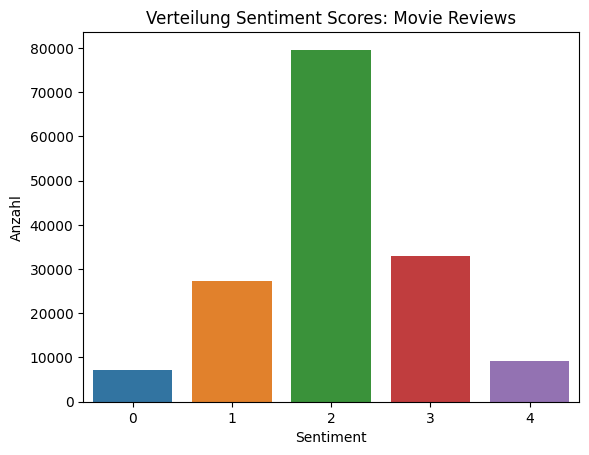

In [74]:
sns.countplot(x='Sentiment', data=dataset_mr)
plt.title('Verteilung Sentiment Scores: Movie Reviews')
plt.ylabel('Anzahl')

In [75]:
dataset_mr_full_senences = dataset_mr.groupby('SentenceId').first().reset_index()
dataset_mr_full_senences.head(5)

,SentenceId,PhraseId,Phrase,Sentiment
0,1,1,"A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .",1
1,2,64,"This quiet , introspective and entertaining independent is worth seeking .",4
2,3,82,"Even fans of Ismail Merchant 's work , I suspect , would have a hard time sitting through this one .",1
3,4,117,"A positively thrilling combination of ethnography and all the intrigue , betrayal , deceit and murder of a Shakespearean tragedy or a juicy soap opera .",3
4,5,157,Aggressive self-glorification and a manipulative whitewash .,1


Text(0, 0.5, 'Anzahl')

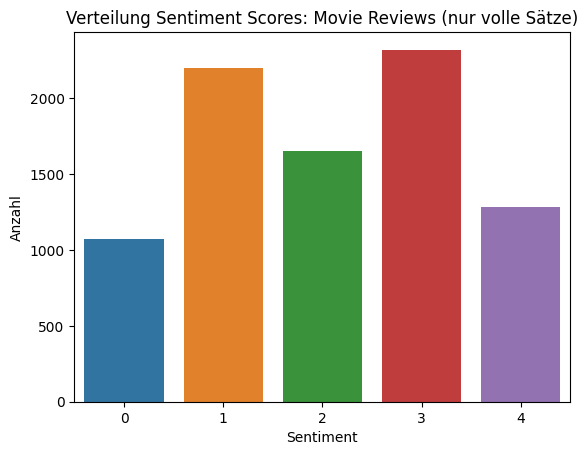

In [76]:
sns.countplot(x='Sentiment', data=dataset_mr_full_senences)
plt.title('Verteilung Sentiment Scores: Movie Reviews (nur volle Sätze)')
plt.ylabel('Anzahl')

In [105]:
print(f'Länge Datensatz nach Kürzung: {len(dataset_mr_full_senences)}')

Länge Datensatz nach Kürzung: 8529


## 1.3 Vereinheitlichung und Aufbereitung

Da wir die Trainingsmethoden auf verschiedenen Datensätzen aus unterschiedlichen Domänen vergleichen wollten, mussten wir das Format der Daten vereinheitlichen. Da die meisten anderen Datensätze zum Thema Sentiment Analysis meinst nur positiv und negativ oder positiv, negativ und neutral als Labels aufwiesen, haben wir uns dazu entschieden die Sentiment Scores auf 3 Klassen zu vereinhtlichen: positiv, negativ und neutral. Zudem haben wir uns dazu entschieden die Daten bipolar zu skalieren. Dies ergibt inhaltlich Sinn, weil die inhaltliche Bedeutung der Labels (positiv und negativ) auch bipolar ist. Daraus haben wir für diesen Datensatz folgendes Mapping entwickelt: 0, 1 -> -1 (negativ) 2 -> 0 (neutral) 3, 4 -> 1 (positiv)

Zudem haben wir die Daten in 8 gleichgroße Datensätze aufgeteilt. Grund dafür ist, dass wir bei den ersten Versuchen ein Neuronales Netz mit den Daten zu trainieren, der RAM nicht ausgereicht hat, um alle Daten gleichzeitig zu verarbeiten. 6 der 8 Datensätze haben wir als Trainings-Sets, einen als Validation- und einen als Test-Set definiert. Unsere Idee war im Training durch die Trainings-Sets zu rotieren und die Datensätz so immer reihum zu berücksichtigen.

Da die Verteilung der 3 Klassen in den 8 Datensätzen zunächst nicht homogen ist, wie unten zu sehen ist, haben wir nach dem Aufteilen der Daten jeden Datensatz neu 'gesampelt'. Wir haben dazu jedem Datensatz so oft zufällige Sampels aus einer Klasse aus dem selben Datensatz neu hinzugefügt, also Doppelungen erzeugt, bis alle Klassen so viele Sampels hatten, wie die Klasse mit den meisten Sampels in dem Datensatz. Dieses 'Balacing' musste nach dem Aufteilen der Datensätze geschehen, weil sonst eine Durchmischung der Daten zwischen den Datensätzen stattgefunden hätte. Eine solche Durchmischung zwischen den Trainings-Sets wäre unproblematisch gewesen. Eine Durchmischung mit dem Validation und Testset hätte jedoch dazu geführt, dass man Overfitting schlechter erkennt, weil der Klassifizierer die Daten zur Validierung und zum Test dann schon gesehen hat.

In [77]:
value_mapping = {0: -1, 1: -1, 2: 0, 3: 1, 4: 1}
dataset_mr_relabled = dataset_mr_full_senences
dataset_mr_relabled['Sentiment'] = dataset_mr_relabled['Sentiment'].map(value_mapping)
dataset_mr_relabled.head()

,SentenceId,PhraseId,Phrase,Sentiment
0,1,1,"A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .",-1
1,2,64,"This quiet , introspective and entertaining independent is worth seeking .",1
2,3,82,"Even fans of Ismail Merchant 's work , I suspect , would have a hard time sitting through this one .",-1
3,4,117,"A positively thrilling combination of ethnography and all the intrigue , betrayal , deceit and murder of a Shakespearean tragedy or a juicy soap opera .",1
4,5,157,Aggressive self-glorification and a manipulative whitewash .,-1


In [78]:
def dataset_split(dataset: pd.DataFrame, n: int):
    """
    Funktion, um ein dataset in mehrere gleichgroße Datasets zu splitte
    :param dataset: dataset, das gesplittet werden soll
    :param n: Anzahl der Subset, in die gesplittet werden soll
    :return: Subsets
    """
    set_size = dataset.shape[0]/n
    subsets = []
    for _ in range(n):
        subsets.append(dataset.loc[_*set_size:(_+1)*set_size, :])
    return subsets


In [79]:
def balancing(dataset: pd.DataFrame, column_label: str):
    """
    Funktion um einen Datensatz nach enthaltenen Labels zu balancen.
    :param dataset: Dataset, das balanced werden soll.
    :param column_label: Spalte in der sich die Labels befinden.
    :return: Balanced dataset
    """
    balanced_set = dataset
    sentiment_groups = dataset[column_label].value_counts()
    max_size = sentiment_groups.max()

    for i in sentiment_groups.index.values:
        ratio = int(max_size / sentiment_groups[i])

        for j in range(int(ratio)+1):
            current_size = balanced_set[column_label].value_counts()[i]
            n = min([(max_size-current_size), sentiment_groups[i]])
            balanced_set = pd.concat([balanced_set, dataset.loc[dataset[column_label] == i].sample(n=n)])

    return balanced_set.sample(frac=1)

In [80]:
def save_dataset(dataset, name, path):
    """
    Speichert ein pandas DataFrame als csv
    :param dataset: pandas DataFrame
    :param name: Name des csv-files
    :param path: Pfand zum Ordner, wo das csv-file gespeichert werden soll
    :return: None
    """
    file_path = path + "/"+ name
    dataset.to_csv(path_or_buf=file_path, sep=";")

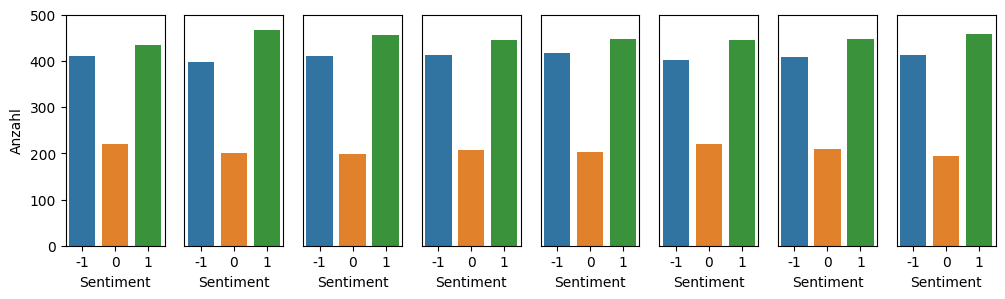

In [81]:
subsets = dataset_split(dataset_mr_relabled, 8)

fig, axes = plt.subplots(1, len(subsets), figsize=(12,3))\
#TODO: Titel
for _, ax in enumerate(axes):
    sns.countplot(x='Sentiment', data=subsets[_], ax=ax)
    ax.set_ylabel('Anzahl')
    ax.set_ylim(top=500)
    if (_ > 0):
        ax.get_yaxis().set_visible(False)

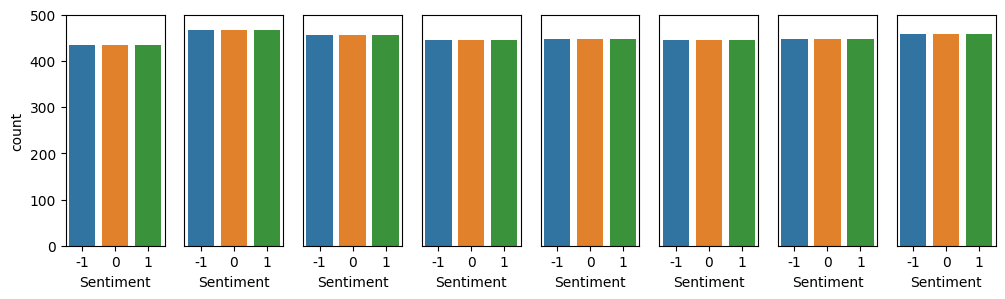

In [82]:
for i in range(len(subsets)):
    subsets[i] = balancing(subsets[i], "Sentiment")

fig, axes = plt.subplots(1, len(subsets), figsize=(12,3))
for _, ax in enumerate(axes):
    sns.countplot(x='Sentiment', data=subsets[_], ax=ax)
    ax.set_ylim(top=500)
    if (_ > 0):
        ax.get_yaxis().set_visible(False)

In [83]:
SAVE_FILES = False

# Zusammenfügen gesamttrainingsset

trainset_complete = pd.concat(subsets[:6])

dir_path = "../data/datasets_mr"

if SAVE_FILES:
  save_dataset(subsets[0], "Trainset_1.csv", dir_path)
  save_dataset(subsets[1], "Trainset_2.csv", dir_path)
  save_dataset(subsets[2], "Trainset_3.csv", dir_path)
  save_dataset(subsets[3], "Trainset_4.csv", dir_path)
  save_dataset(subsets[4], "Trainset_5.csv", dir_path)
  save_dataset(subsets[5], "Trainset_6.csv", dir_path)
  save_dataset(trainset_complete, "Trainset_complete.csv", dir_path)
  save_dataset(subsets[6], "Evaluationset.csv", dir_path)
  save_dataset(subsets[7], "Testset.csv", dir_path)

# 2. Dataset: Tweets

Der zweite Datensatz enthält 1.6 Millionen Tweets und stammt ebenfalls von Kaggle (https://www.kaggle.com/datasets/kazanova/sentiment140). Für diesen Datensatz haben wir uns auf Grund der Länge entschieden. Wie wir später im Notebook zu unseren Versuchen mit dem Larga Language Modell ausführen, reichte der Datensatz nicht aus, um dieses große Modell zu trainieren. Daher haben wir uns für diesen deutlich umfangreicheren Datensatz entschieden, auch wenn diese auch Nachteile mit sich bringt, wie wir weiter unten ausführen.

## 2.1 Technische Datenstruktur

Der Datensatz besteht aus 1599999 Sampeln, die jeweils einen Sentiment Score, eine ID, ein Datum, ein Flag, einen User und die Phrase enthalten. Die für uns relevanten Attribute Sentiment Score und Phrase sind vom Datentyp Integer und String-Object.

In [97]:
with open("../data/tweets.csv", 'r', encoding='latin-1') as csvdatei:
    dataset_tw = pd.read_csv(csvdatei, delimiter=',')
dataset_tw.columns = ['Sentiment','ID','date','flag','user','Phrase']

In [98]:
dataset_tw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   Sentiment  1599999 non-null  int64 
 1   ID         1599999 non-null  int64 
 2   date       1599999 non-null  object
 3   flag       1599999 non-null  object
 4   user       1599999 non-null  object
 5   Phrase     1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [87]:
dataset_tw.describe()

,Sentiment,ID
count,1.599999e+06,1.599999e+06
mean,2.000001e+00,1.998818e+09
std,2.000001e+00,1.935757e+08
min,0.000000e+00,1.467811e+09
25%,0.000000e+00,1.956916e+09
50%,4.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


## 2.2 Inhaltliche Struktur der Daten & Aufbereitung

Da wir die Spalten date, flag und user nicht benötigen, haben wir diese hier für die weitere Arbeit aus dem Datensatz entfernt. Bei einem Blick auf die ersten Sampels sieht man, dass im Gegensatz zum ersten Datensatz hier offensichtlich jedes Sample einen anderen Tweet enthält und diese scheinbar vollständig ist. Jedoch sind die Samples nach Sentiment sortiert. Um später beim Aufspalten das Datensatzes alle Sentiment Klassen in allen Subsets zu repräsentieren und unsere Split-Funktion die Samples nicht zufällig aufteilt, haben wir die Daten an dieser Stelle zunächst geshuffled. Zudem haben wir auch hier die Klassen-Labels auf -1 bis 0 gesetzt. Bei einem Blick auf das Histogramm unten erkennt man, welchen Vorteil und welchen Nachteil dieser Datensatz für unser Projekt hat. Der Nachteil ist, dass es nur zwei Sentiment-Klassen gibt (positiv und negativ). Der Vorteil ist, dass die Daten bereits balanciert sind.

In [99]:
# Cleaning: nicht benötigte Spalten löschen, Spalten umbenennen
dataset_tw.drop(['date','flag','user'], axis=1, inplace=True)
dataset_tw.head(10)

,Sentiment,ID,Phrase
0,0,1467810672,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
1,0,1467810917,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
2,0,1467811184,my whole body feels itchy and like its on fire
3,0,1467811193,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."
4,0,1467811372,@Kwesidei not the whole crew
...,...,...,...
95,0,1467836500,"so rylee,grace...wana go steve's party or not?? SADLY SINCE ITS EASTER I WNT B ABLE 2 DO MUCH BUT OHH WELL....."
96,0,1467836576,"hey, I actually won one of my bracket pools! Too bad it wasn't the one for money"
97,0,1467836583,"@stark YOU don't follow me, either and i work for you!"
98,0,1467836859,A bad nite for the favorite teams: Astros and Spartans lose. The nite out with T.W. was good.


In [100]:
dataset_tw = sklearn.utils.shuffle(dataset_tw, random_state=42).reset_index(drop=True)
value_mapping = {0: -1, 1: -1, 2: 0, 3: 1, 4: 1}
dataset_tw_relabled = dataset_tw
dataset_tw_relabled['Sentiment'] = dataset_tw_relabled['Sentiment'].map(value_mapping)
dataset_tw_relabled.head(10)

,Sentiment,ID,Phrase
0,-1,2200003313,@Nkluvr4eva My poor little dumpling In Holmdel vids he was really trying...Hope he dont try to hard tonight xx
1,-1,1467998601,I'm off too bed. I gotta wake up hella early tomorrow morning.
2,-1,2300049112,I havent been able to listen to it yet My speakers are busted
3,-1,1993474319,now remembers why solving a relatively big equation with two unknowns is a total pain in the butt
4,-1,2256551006,"Ate too much, feel sick"
5,-1,2052381070,Tried to purchase a parked domain through GoDaddy. $70 down the drain kind of like gambling...
6,1,1983449090,on lunch....dj should come eat with me
7,-1,2245480599,Just got back from VA Tech Equine Medical Center...my poor Lilly has to be on stall rest for at least another month
8,-1,1770706008,can't log in to my other twitter account. super bummed
9,1,2050057894,@TamaraSchilling Adventure - That's what we all need in our life. I am glad you had a great week. Thanks for yr response


Text(0, 0.5, 'Anzahl')

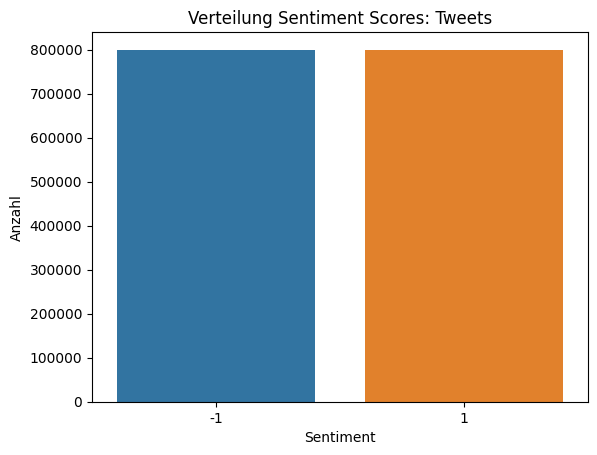

In [102]:
sns.countplot(x='Sentiment', data=dataset_tw)
plt.title('Verteilung Sentiment Scores: Tweets')
plt.ylabel('Anzahl')

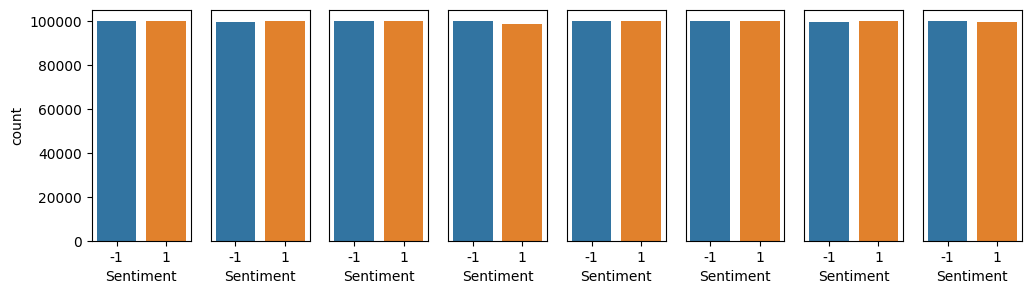

In [93]:
subsets_tw = dataset_split(dataset_tw_relabled, 8)

fig, axes = plt.subplots(1, len(subsets_tw), figsize=(12,3))
for _, ax in enumerate(axes):
    sns.countplot(x='Sentiment', data=subsets_tw[_], ax=ax)
    if (_ > 0):
        ax.get_yaxis().set_visible(False)

In [94]:
SAVE_FILES = False

# Zusammenfügen gesamt trainingsset
trainset_complete_tw = pd.concat(subsets_tw[:6])

dir_path = "../data/dataset_tw"

if SAVE_FILES:
  save_dataset(subsets_tw[0], "Trainset_1.csv", dir_path)
  save_dataset(subsets_tw[1], "Trainset_2.csv", dir_path)
  save_dataset(subsets_tw[2], "Trainset_3.csv", dir_path)
  save_dataset(subsets_tw[3], "Trainset_4.csv", dir_path)
  save_dataset(subsets_tw[4], "Trainset_5.csv", dir_path)
  save_dataset(subsets_tw[5], "Trainset_6.csv", dir_path)
  save_dataset(trainset_complete_tw, "Trainset_complete.csv", dir_path)
  save_dataset(subsets_tw[6], "Validationset.csv", dir_path)
  save_dataset(subsets_tw[7], "Testset.csv", dir_path)

# Dataset: Amazon

In [95]:
with open("../data/amazon.csv") as csvdatei:
    dataset_am = pd.read_csv(csvdatei, delimiter=',')

FileNotFoundError: ignored

In [ ]:
dataset_am.info()

In [ ]:
pd.set_option('display.max_colwidth', None)
dataset_am.columns = ['Unnamed','Phrase','Polarity','Sentiment']
dataset_am.head(10)

In [ ]:
dataset_am['Sentiment'].value_counts()

In [ ]:
value_mapping = {'positive': 1, 'neutral': 0, 'negative': -1}
dataset_am_relabled = dataset_am
dataset_am_relabled['Sentiment'] = dataset_am_relabled['Sentiment'].map(value_mapping)
dataset_am_relabled.head(10)

In [ ]:
def dataset_split(dataset: pd.DataFrame, n: int):
    """
    Funktion, um ein dataset in mehrere gleichgroße Datasets zu splitte
    :param dataset: dataset, das gesplittet werden soll
    :param n: Anzahl der Subset, in die gesplittet werden soll
    :return: Subsets
    """
    set_size = int(dataset.shape[0]/n)
    subsets = []
    for _ in range(n):
        subsets.append(dataset.loc[_*set_size:(_+1)*set_size, :])
    return subsets

In [ ]:
def save_dataset(dataset, name, path):
    """
    Speichert ein pandas DataFrame als csv
    :param dataset: pandas DataFrame
    :param name: Name des csv-files
    :param path: Pfand zum Ordner, wo das csv-file gespeichert werden soll
    :return: None
    """
    file_path = path + "/"+ name
    dataset.to_csv(path_or_buf=file_path, sep=";")

In [ ]:
subsets = dataset_split(dataset_am, 8)

fig, axes = plt.subplots(1, len(subsets), figsize=(12,3))
for _, ax in enumerate(axes):
    sns.countplot(x='Sentiment', data=subsets[_], ax=ax)
    if (_ > 0):
        ax.get_yaxis().set_visible(False)

In [ ]:
def balancing(dataset: pd.DataFrame, column_label: str):
    """
    Funktion um einen Datensatz nach enthaltenen Labels zu balancen.
    :param dataset: Dataset, das balanced werden soll.
    :param column_label: Spalte in der sich die Labels befinden.
    :return: Balanced dataset
    """
    balanced_set = dataset
    sentiment_groups = dataset[column_label].value_counts()
    max_size = sentiment_groups.max()

    for i in sentiment_groups.index.values:
        ratio = int(max_size / sentiment_groups[i])

        for j in range(int(ratio)+1):
            current_size = balanced_set[column_label].value_counts()[i]
            n = min([(max_size-current_size), sentiment_groups[i]])
            balanced_set = pd.concat([balanced_set, dataset.loc[dataset[column_label] == i].sample(n=n)])

    return balanced_set.sample(frac=1)

In [ ]:
for i in range(len(subsets)):
    subsets[i] = balancing(subsets[i], "Sentiment")

fig, axes = plt.subplots(1, len(subsets), figsize=(12,3))
for _, ax in enumerate(axes):
    sns.countplot(x='Sentiment', data=subsets[_], ax=ax)
    if (_ > 0):
        ax.get_yaxis().set_visible(False)

In [ ]:
SAVE_FILES = False

# Zusammenfügen gesamttrainingsset
trainset_complete = pd.concat(subsets[:6])

dir_path = "../data/dataset_am"

if SAVE_FILES:
  save_dataset(subsets[0], "Trainset_1.csv", dir_path)
  save_dataset(subsets[1], "Trainset_2.csv", dir_path)
  save_dataset(subsets[2], "Trainset_3.csv", dir_path)
  save_dataset(subsets[3], "Trainset_4.csv", dir_path)
  save_dataset(subsets[4], "Trainset_5.csv", dir_path)
  save_dataset(subsets[5], "Trainset_6.csv", dir_path)
  save_dataset(trainset_complete, "Trainset_complete.csv", dir_path)
  save_dataset(subsets[6], "Evaluationset.csv", dir_path)
  save_dataset(subsets[7], "Testset.csv", dir_path)